In [2]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat './kaggle.json': No such file or directory


In [20]:
#Downloading dataset
!kaggle datasets download -d emmarex/plantdisease

plantdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [5]:
#Unzipping the file
import zipfile
zip_ref = zipfile.ZipFile('/content/plantdisease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
#Loading the images
x_data= keras.utils.image_dataset_from_directory(
    directory = '/content/PlantVillage',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(256,256)

)

Found 20638 files belonging to 15 classes.


In [7]:
# Spliting data into train and test
train_ds =x_data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/PlantVillage',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=42
)

Found 20638 files belonging to 15 classes.
Using 4127 files for validation.


In [8]:
class_names = x_data.class_names
len(class_names)

15

In [9]:
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

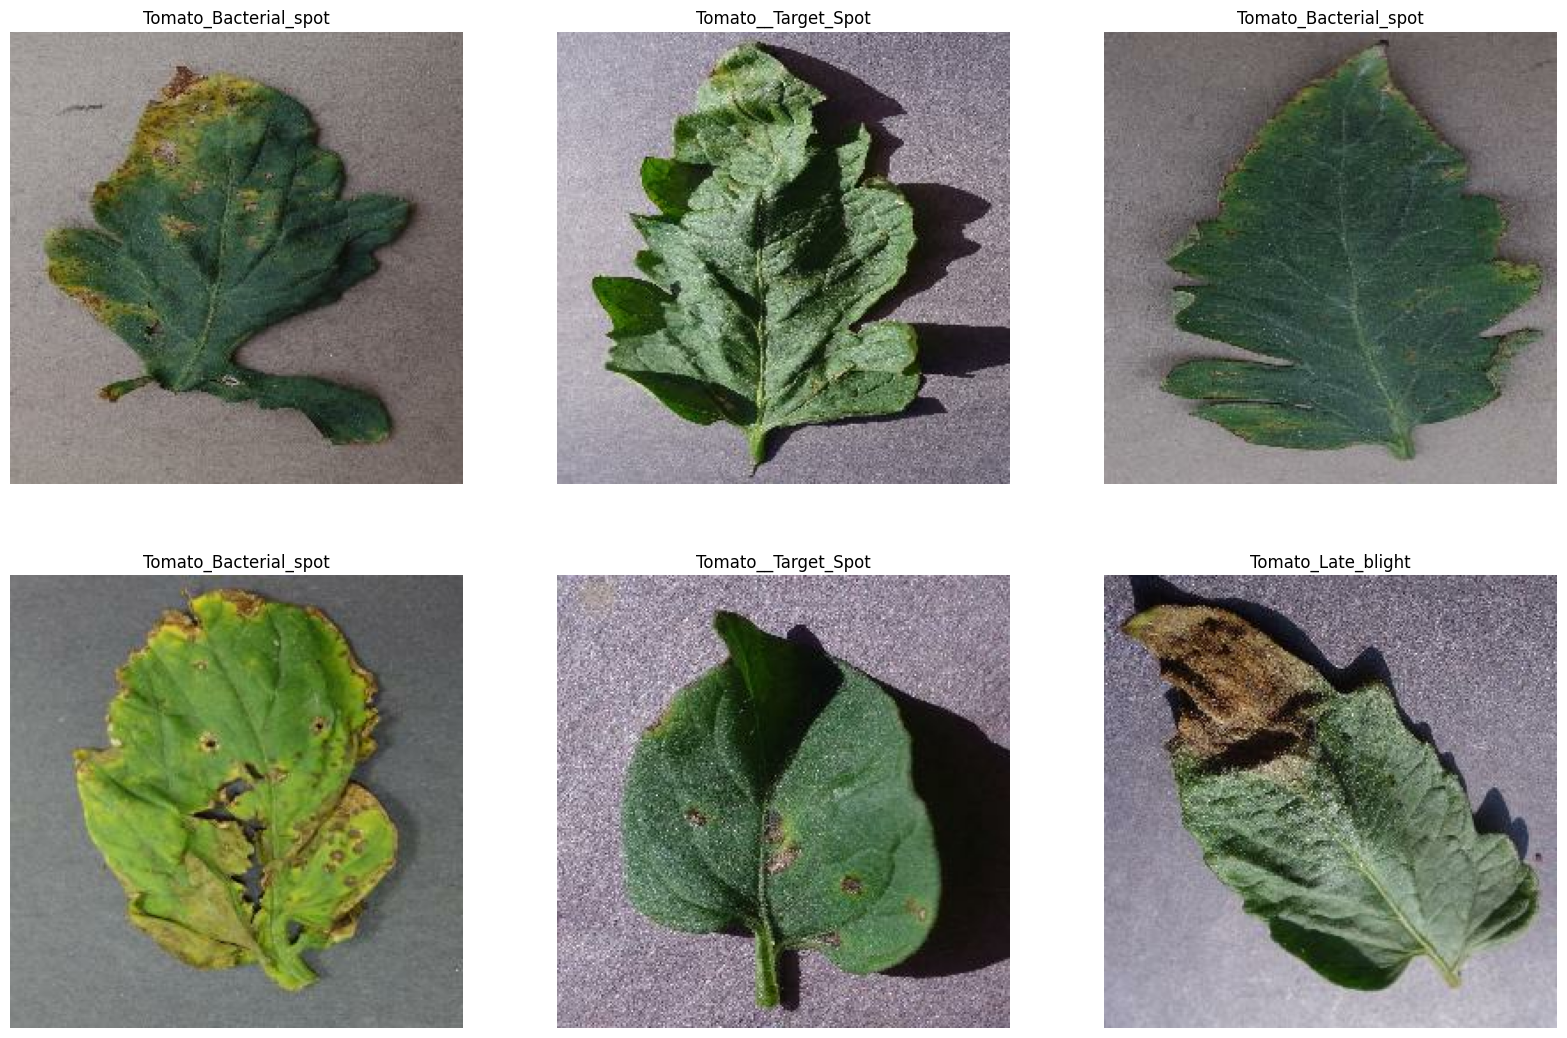

In [24]:
# Displaying a few sample images
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [11]:
input_shape = (256, 256, 3)

In [12]:
# Createing the base model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)
base_model.trainable = False

In [13]:
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(15, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 15)                1966095   
                                                                 
Total params: 25,553,807
Trainable params: 1,966,095
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#Training
history = model.fit(train_ds,epochs=5, batch_size=200, validation_data=test_ds)

Epoch 1/5
207/207 [==============================] - 6724s 32s/step - loss: 3.1929 - accuracy: 0.8529 - val_loss: 0.4595 - val_accuracy: 0.9561
Epoch 2/5
207/207 [==============================] - 6621s 32s/step - loss: 0.4026 - accuracy: 0.9658 - val_loss: 0.2564 - val_accuracy: 0.9750
Epoch 3/5
207/207 [==============================] - 6603s 32s/step - loss: 0.2103 - accuracy: 0.9809 - val_loss: 0.1978 - val_accuracy: 0.9806
Epoch 4/5
207/207 [==============================] - 6624s 32s/step - loss: 0.2016 - accuracy: 0.9829 - val_loss: 0.1056 - val_accuracy: 0.9884
Epoch 5/5
207/207 [==============================] - 6675s 32s/step - loss: 0.2582 - accuracy: 0.9826 - val_loss: 0.3493 - val_accuracy: 0.9789


In [17]:
model.evaluate(test_ds)

129/129 [==============================] - 1066s 8s/step - loss: 0.3493 - accuracy: 0.9789


[0.34929603338241577, 0.9789193272590637]

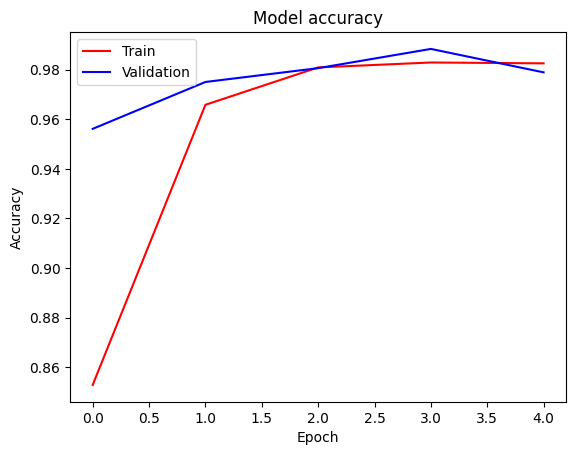

In [18]:
#Plotting  Graphs - Accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

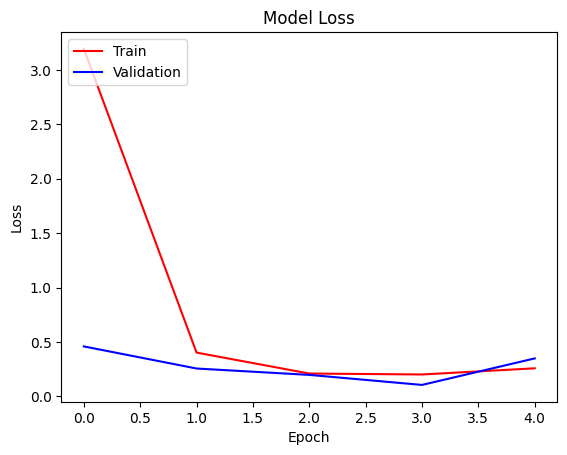

In [19]:
#Loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()